In [171]:
import pandas as pd
import numpy as np

In [156]:
df_data = pd.read_excel("Новый диплом датасет.xlsx", sheet_name = "Данные",  parse_dates=['dtime_pay'])
df_clients = pd.read_excel("Новый диплом датасет.xlsx", sheet_name = "Clients", parse_dates=['dtime_ad'])
df_region_dict = pd.read_excel("Новый диплом датасет.xlsx", sheet_name = "Region_dict")

In [158]:
df_data = df_data.dropna(subset = ['amt_payment', 'dtime_pay','id_client'])

In [160]:
df_clients.describe()

,id_client,nflag_test,id_trading_point
count,55605.000000,55605.000000,55605.000000
mean,227974.818344,0.463879,1095.527363
std,45272.325725,0.498698,1642.650476
min,178561.000000,0.000000,1.000000
25%,192462.000000,0.000000,112.000000
50%,206364.000000,0.000000,516.000000
75%,262665.000000,1.000000,1101.000000
max,331964.000000,1.000000,9931.000000


In [161]:
df_clients = df_clients.dropna()

In [162]:
df_region_dict = df_region_dict.dropna()

In [165]:
trading_point_city = df_region_dict.groupby('city')['id_trading_point'].nunique().reset_index()

In [166]:
trading_point_city = trading_point_city.rename(columns = {'id_trading_point': 'count_trading_point'} )

In [167]:
trading_point_city = trading_point_city.sort_values(by = 'count_trading_point', ascending = False)

In [168]:
trading_point_city

,city,count_trading_point
15,Санкт-Петербург,11
7,Москва,11
4,Казань,6
10,Новосибирск,6
6,Красноярск,5
5,Краснодар,4
14,Самара,4
8,Мурманск,2
18,Сочи,2
16,Саратов,2


In [169]:
import matplotlib.pyplot as plt

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\3428942173.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (ax.get_xticklabels(), rotation =90)


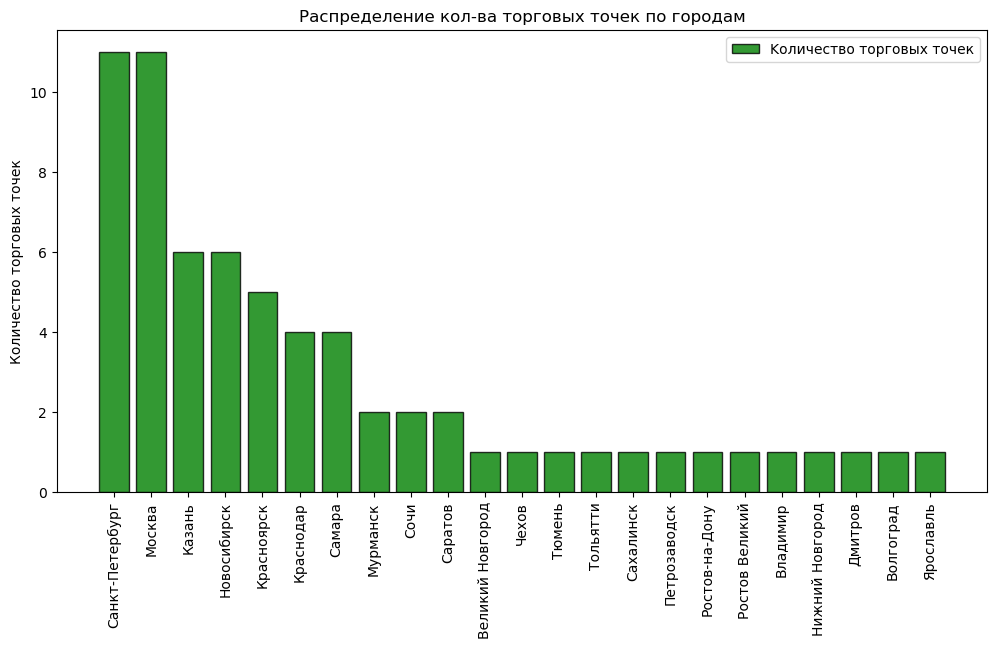

In [170]:
fig, ax  = plt.subplots(nrows=1, ncols=1, figsize= (12, 6))

ax.bar(trading_point_city['city'],trading_point_city['count_trading_point'], edgecolor = 'black', color = 'green' ,alpha = .8, label = "Kоличество торговых точек" )
ax.set_ylabel('Количество торговых точек')
ax.set_title('Распределение кол-ва торговых точек по городам')
ax.set_xticklabels (ax.get_xticklabels(), rotation =90)
ax.legend (loc = 'upper right')
plt.show()


In [138]:
# часть 2 

In [30]:
df_data_1 = pd.read_excel("Новый диплом датасет.xlsx", sheet_name = "Данные",  parse_dates=['dtime_pay'])

In [31]:
df_data_1.head(3)

,id_order,id_client,amt_payment,dtime_pay,ТТ,nflag_test
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221,1654.0,1.0
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992,80.0,0.0
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744,309.0,0.0


In [33]:
df_sum_amt_payment_client = df_data_1.groupby('id_client')['amt_payment'].sum().reset_index()

In [34]:
df_sum_amt_payment_client = df_sum_amt_payment_client.rename(columns = {'amt_payment': 'sum_amt_payment'})

In [35]:
df_sum_amt_payment_client.head(10) 

,id_client,sum_amt_payment
0,178561.0,3052.0
1,178562.0,2439.0
2,178563.0,768.0
3,178564.0,0.0
4,178565.0,958.0
5,178566.0,5474.0
6,178567.0,2663.0
7,178568.0,13537.0
8,178569.0,2008.0
9,178570.0,6651.0


In [36]:
df_sum_amt_payment_client.describe()

,id_client,sum_amt_payment
count,29712.000000,29712.000000
mean,194102.995456,4273.780897
std,8970.486445,2744.597934
min,178561.000000,0.000000
25%,186335.750000,2706.000000
50%,194110.500000,3759.500000
75%,201866.250000,5473.250000
max,209634.000000,43083.000000


In [38]:
df_clients_payment_trading_point = df_clients.merge (df_sum_amt_payment_client , on = 'id_client', how ='left')

In [143]:
df_clients_payment_trading_point.head(10)

,id_client,dtime_ad,nflag_test,id_trading_point,sum_amt_payment
0,180844,2022-06-08 18:38:41.414,0,212,5349.0
1,226069,2022-07-11 16:28:38.511,1,54,0.0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0
3,322530,2022-07-08 08:56:08.714,0,1015,0.0
4,254313,2022-06-19 22:18:01.770,1,453,0.0
5,195818,2022-07-16 01:30:59.088,1,2652,4021.0
6,267165,2022-06-25 09:54:06.470,0,866,0.0
7,246645,2022-07-03 22:13:08.299,0,1099,0.0
8,274394,2022-06-25 00:46:07.492,1,2652,0.0
9,200225,2022-07-27 00:18:47.370,0,453,4372.0


In [145]:
df_clients_payment_trading_point.describe()

,id_client,nflag_test,id_trading_point,sum_amt_payment
count,55356.000000,55356.000000,55356.000000,55356.000000
mean,228125.335284,0.463870,1100.387546,2276.895513
std,45314.421035,0.498697,1644.737965,2927.563162
min,178561.000000,0.000000,1.000000,0.000000
25%,192502.750000,0.000000,112.000000,0.000000
50%,206464.500000,0.000000,516.000000,932.500000
75%,262980.500000,1.000000,1101.000000,3884.000000
max,331964.000000,1.000000,9931.000000,43083.000000


In [147]:
df_clients_payment_trading_point .loc [ df_clients_payment_trading_point ['sum_amt_payment'].isna(), 'sum_amt_payment'] = 0 

In [148]:
df_clients_payment_trading_point.head(4)

,id_client,dtime_ad,nflag_test,id_trading_point,sum_amt_payment
0,180844,2022-06-08 18:38:41.414,0,212,5349.0
1,226069,2022-07-11 16:28:38.511,1,54,0.0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0
3,322530,2022-07-08 08:56:08.714,0,1015,0.0


In [150]:
df_clients_payment_trading_point_region = df_clients_payment_trading_point.merge (df_region_dict, on = 'id_trading_point')

In [151]:
df_clients_payment_trading_point_region.head(3)

,id_client,dtime_ad,nflag_test,id_trading_point,sum_amt_payment,city
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск
1,223863,2022-08-20 21:56:54.325,0,212,0.0,Красноярск
2,201715,2022-07-30 19:07:49.264,1,212,4171.0,Красноярск


In [153]:
df_clients_payment_trading_point_region['flag_pay'] = None

In [50]:
for i in range (len(df_clients_payment_trading_point_region)):
    if df_clients_payment_trading_point_region['sum_amt_payment'].iloc[i] == 0:
        
        df_clients_payment_trading_point_region.loc [i,'flag_pay'] = 0
    else:
        df_clients_payment_trading_point_region.loc [i,'flag_pay'] = 1

In [51]:
df_clients_payment_trading_point_region.head(3)

,id_client,dtime_ad,nflag_test,id_trading_point,sum_amt_payment,city,flag_pay
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,223863,2022-08-20 21:56:54.325,0,212,0.0,Красноярск,0
2,201715,2022-07-30 19:07:49.264,1,212,4171.0,Красноярск,1


In [53]:
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import seaborn as sns

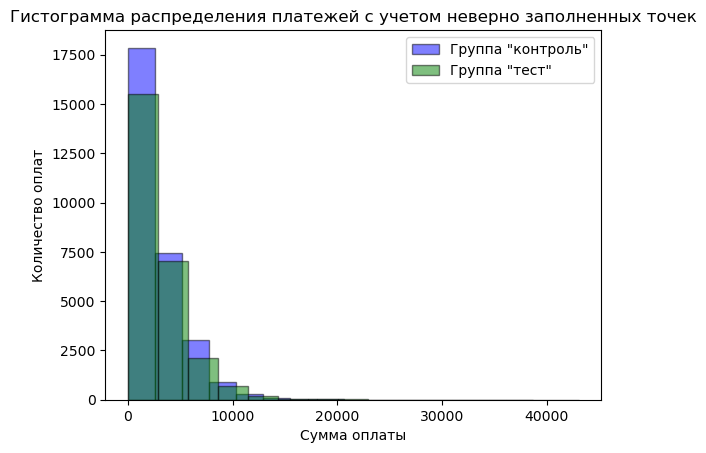

In [55]:
df_c = df_clients_payment_trading_point_region [df_clients_payment_trading_point_region ['nflag_test'] == 0]
df_t = df_clients_payment_trading_point_region [df_clients_payment_trading_point_region['nflag_test'] == 1]
df_c = df_c ['sum_amt_payment']
df_t = df_t ['sum_amt_payment']
plt.hist(df_c, bins = 15, color = 'blue', alpha = 0.5, edgecolor = 'black', label = 'Группа "контроль"')
plt.hist(df_t, bins = 15, color = 'green', alpha = 0.5, edgecolor = 'black', label = 'Группа "тест" ')
plt.title ('Гистограмма распределения платежей c учетом неверно заполненных точек')
plt.xlabel('Сумма оплаты')
plt.ylabel ('Количество оплат')
plt.legend(loc = 'upper right')
plt.show()

In [56]:
df_control = df_clients_payment_trading_point_region [df_clients_payment_trading_point_region ['nflag_test']== 0] ['flag_pay'].astype('int64')
df_test = df_clients_payment_trading_point_region [df_clients_payment_trading_point_region ['nflag_test']== 1] ['flag_pay'].astype('int64')

In [57]:
def test_calc(r1, r2, alpha=.05):
    s,p = ttest_ind(r1,r2)
    if p <alpha:
        print('Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ')
        if s > 0 :
                print("Среднее в контрольной группе ВЫШЕ, чем в тестовой")
        else: 
                print("Среднее в контрольной группе НИЖЕ, чем в тестовой")
    else:
        print('Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ')
    return s,p

In [58]:
test_calc(df_control,df_test)

Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой


(-5.337368723522205, 9.467531936679659e-08)

In [60]:
def mann_whitney_func(r1, r2, alpha=.05):
    
    s_mw, p_mw = mannwhitneyu(r1, r2, alternative = 'two-sided')
    if p_mw <alpha:
        print('Распределения в контрольной и тестовой группе НЕ равны')
    else:
        print('Статистически значимых различий между распределениями нет')
    return s_mw, p_mw

In [61]:
mann_whitney_func(df_control,df_test)

Распределения в контрольной и тестовой группе НЕ равны


(372374256.0, 9.499650200208217e-08)

In [62]:
print(" Распределения и средние значения в контрольной и тестовой группе НЕ равны ")

 Распределения и средние значения в контрольной и тестовой группе НЕ равны 


In [64]:
df_gr = df_clients_payment_trading_point_region.groupby(['id_trading_point','nflag_test'])['sum_amt_payment'].sum().reset_index()

In [65]:
##df_gr.head(20)

In [66]:
list_not_payments = []
for i in df_gr['id_trading_point'].unique():
    group_c = df_gr[(df_gr ['id_trading_point']==i)&(df_gr['nflag_test']==0)]
    group_t = df_gr[(df_gr ['id_trading_point']==i)&(df_gr['nflag_test']==1)]
    if group_c['sum_amt_payment'].sum()== 0 or  group_t ['sum_amt_payment'].sum()== 0:
         list_not_payments.append(i)
print (list_not_payments) 

[1, 4, 7, 13, 23, 26, 46, 228, 603, 739, 800, 810, 866, 1015, 1099]


In [68]:
df_gr_сl = df_clients_payment_trading_point_region.groupby(['id_trading_point','nflag_test'])['id_client'].count().reset_index()

In [69]:
##df_gr_сl.head(30)

In [70]:
list_not_clients = []
for i in df_gr_сl ['id_trading_point'].unique():
    group_c = df_gr_сl[(df_gr_сl ['id_trading_point']==i)&(df_gr_сl['nflag_test']==0)]
    group_t = df_gr_сl[(df_gr_сl ['id_trading_point']==i)&(df_gr_сl['nflag_test']==1)]
    if group_c['id_client'].count()== 0 or group_t['id_client'].count()== 0:
         list_not_clients.append(i)
print (list_not_clients) 

[228, 603, 739, 800, 810, 866, 1015, 1099]


In [72]:
df_res = df_clients_payment_trading_point_region[~df_clients_payment_trading_point_region['id_trading_point']
        .isin (list_not_payments + list_not_clients)]

In [73]:
df_res.head()

,id_client,dtime_ad,nflag_test,id_trading_point,sum_amt_payment,city,flag_pay
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,223863,2022-08-20 21:56:54.325,0,212,0.0,Красноярск,0
2,201715,2022-07-30 19:07:49.264,1,212,4171.0,Красноярск,1
3,292010,2022-07-26 20:37:16.885,1,212,0.0,Красноярск,0
4,190438,2022-07-02 12:53:04.753,1,212,6026.0,Красноярск,1


In [74]:
df_res.describe()

,id_client,nflag_test,id_trading_point,sum_amt_payment
count,45318.000000,45318.000000,45318.000000,45318.000000
mean,228009.605918,0.495278,1202.962002,2321.128536
std,45298.985278,0.499983,1792.091001,2964.741803
min,178561.000000,0.000000,2.000000,0.000000
25%,192426.250000,0.000000,112.000000,0.000000
50%,206413.500000,0.000000,453.000000,1184.000000
75%,262840.000000,1.000000,1654.000000,3912.000000
max,331964.000000,1.000000,9931.000000,43083.000000


In [75]:
df_res ['id_trading_point'].unique()

array([ 212,   54,  991,  453, 2652,  278, 6543,  699,  477,  544,   80,
         88,   19,  112,   66,  394,   72,  202,   11,   55, 1287,  801,
         33,  444, 1101,   34,  573, 1989,  576,  309, 3987, 8543,  516,
        900, 2212,  439,   35,  117, 1654,  277,   69,   82,  213,   36,
         73,  891, 9121, 9931,    2, 3786, 1002], dtype=int64)

In [76]:
unique_tp = df_res ['id_trading_point'].nunique()
print(unique_tp)

51


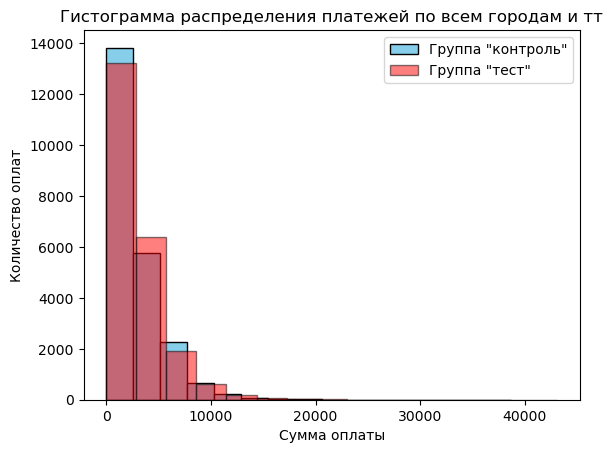

In [78]:
df_0 = df_res [df_res ['nflag_test'] == 0]
df_1 = df_res [df_res ['nflag_test'] == 1]
df_0 = df_0 ['sum_amt_payment']
df_1 = df_1 ['sum_amt_payment']
plt.hist(df_0, bins = 15, color = 'skyblue', edgecolor = 'black', label = 'Группа "контроль"')
plt.hist(df_1, bins = 15, color = 'red', alpha = 0.5, edgecolor = 'black', label = 'Группа "тест" ')
##plt.axvline( x = perc_95, color = 'red', linestyle = '--')
plt.title ('Гистограмма распределения платежей по всем городам и тт')
plt.xlabel('Сумма оплаты')
plt.ylabel ('Количество оплат')
plt.legend(loc = 'upper right')
plt.show()

In [80]:
test_calc(df_0,df_1)

Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой


(-9.573285274103037, 1.0857547123769424e-21)

In [82]:
df_res_control = df_res [df_res ['nflag_test']== 0] ['flag_pay'].astype('int64')
df_res_test = df_res [df_res['nflag_test']== 1] ['flag_pay'].astype('int64')

In [83]:
test_calc(df_res_control,df_res_test)

Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой


(-9.406024876422881, 5.384854454774238e-21)

In [85]:
mann_whitney_func(df_res_control,df_res_test)

Распределения в контрольной и тестовой группе НЕ равны


(245371284.5, 5.6162497735928165e-21)

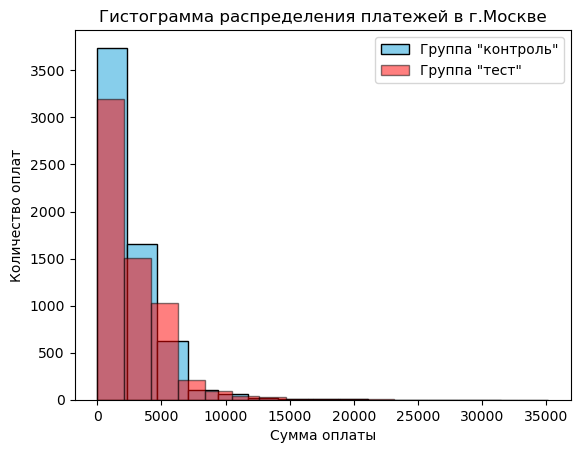

In [87]:
df_0_mos = df_res [(df_res ['nflag_test'] == 0)& (df_res ['city'] == 'Москва')]
df_1_mos = df_res [(df_res ['nflag_test'] == 1) & (df_res ['city'] == 'Москва')]
df_0_mos = df_0_mos ['sum_amt_payment']
df_1_mos = df_1_mos ['sum_amt_payment']
plt.hist(df_0_mos, bins = 15, color = 'skyblue', edgecolor = 'black', label = 'Группа "контроль"')
plt.hist(df_1_mos, bins = 15, color = 'red', alpha = 0.5, edgecolor = 'black', label = 'Группа "тест" ')
plt.title ('Гистограмма распределения платежей в г.Москве')
plt.xlabel('Сумма оплаты')
plt.ylabel ('Количество оплат')
plt.legend(loc = 'upper right')
plt.show()

In [88]:
test_calc(df_0_mos,df_1_mos)

Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой


(-7.896238614943352, 3.1166496296307097e-15)

In [89]:
df_res_control_mos = df_res[(df_res['nflag_test']== 0) & (df_res ['city'] == 'Москва')] ['flag_pay'].astype('int64')
df_res_test_mos = df_res[(df_res['nflag_test']== 1) & (df_res ['city'] == 'Москва')] ['flag_pay'].astype('int64')

In [90]:
test_calc(df_res_control_mos, df_res_test_mos)

Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой


(-6.427576036124008, 1.3442208722377196e-10)

In [91]:
mann_whitney_func(df_res_control_mos,df_res_test_mos)

Распределения в контрольной и тестовой группе НЕ равны


(17987623.0, 1.3888194541373183e-10)

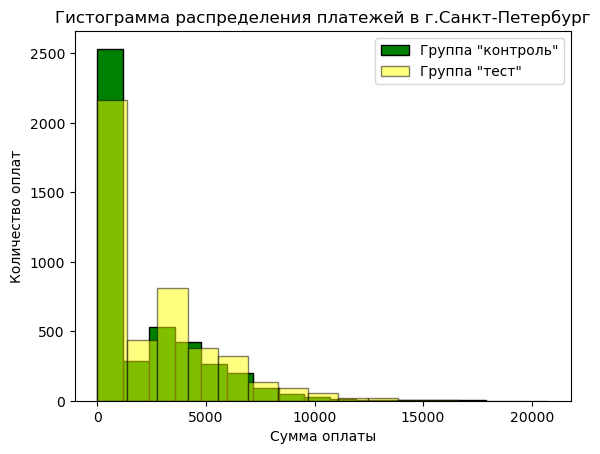

In [93]:
df_0_spb = df_res [(df_res ['nflag_test'] == 0)& (df_res ['city'] == 'Санкт-Петербург')]
df_1_spb = df_res [(df_res ['nflag_test'] == 1) & (df_res ['city'] == 'Санкт-Петербург')]
df_0_spb = df_0_spb ['sum_amt_payment']
df_1_spb = df_1_spb ['sum_amt_payment']
plt.hist(df_0_spb, bins = 15, color = 'green', edgecolor = 'black', label = 'Группа "контроль"')
plt.hist(df_1_spb, bins = 15, color = 'yellow', alpha = 0.5, edgecolor = 'black', label = 'Группа "тест" ')
plt.title ('Гистограмма распределения платежей в г.Санкт-Петербург')
plt.xlabel('Сумма оплаты')
plt.ylabel ('Количество оплат')
plt.legend(loc = 'upper right')
plt.show()

In [94]:
test_calc(df_0_spb,df_1_spb)

Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой


(-8.759635784179547, 2.3198088937974163e-18)

In [95]:
df_res_control_spb = df_res[(df_res['nflag_test']== 0) & (df_res ['city'] == 'Санкт-Петербург')] ['flag_pay'].astype('int64')
df_res_test_spb = df_res[(df_res['nflag_test']== 1) & (df_res ['city'] == 'Санкт-Петербург')] ['flag_pay'].astype('int64')

In [96]:
test_calc(df_res_control_spb, df_res_test_spb)

Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой


(-9.352468686561785, 1.065825659919673e-20)

In [97]:
mann_whitney_func(df_res_control_spb,df_res_test_spb)

Распределения в контрольной и тестовой группе НЕ равны


(8881151.0, 1.3118606823466691e-20)

In [99]:
df_city  = df_res.groupby(['city'])

In [100]:
df_city.head()

,id_client,dtime_ad,nflag_test,id_trading_point,sum_amt_payment,city,flag_pay
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,223863,2022-08-20 21:56:54.325,0,212,0.0,Красноярск,0
2,201715,2022-07-30 19:07:49.264,1,212,4171.0,Красноярск,1
3,292010,2022-07-26 20:37:16.885,1,212,0.0,Красноярск,0
4,190438,2022-07-02 12:53:04.753,1,212,6026.0,Красноярск,1
...,...,...,...,...,...,...,...
54366,312981,2022-08-21 22:13:05.634,1,2,0.0,Дмитров,0
54367,196190,2022-07-16 23:55:56.094,0,2,7228.0,Дмитров,1
54368,195532,2022-07-15 08:46:08.593,0,2,3765.0,Дмитров,1
54369,302544,2022-07-15 11:45:08.113,0,2,0.0,Дмитров,0


In [101]:
for i, j in df_city:
    
    city = i 
    print(f"Город:{city}")
    
    control_group = j [df_res ['nflag_test'] == 0]['flag_pay'].astype('int64')
    test_group = j [df_res ['nflag_test'] == 1]['flag_pay'].astype('int64')
    s,p = ttest_ind(control_group,test_group)
    print(f"s:{s}")
    print(f"p:{p}")
   
    if p < 0.05 :
            print("Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ")
            if s > 0 :
                print("Среднее в контрольной группе ВЫШЕ, чем в тестовой")
            else: 
                print("Среднее в контрольной группе НИЖЕ, чем в тестовой")
    else:
            print("Разницы между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ") 
                
    print()
    

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\3993418544.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df_city:
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\3993418544.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control_group = j [df_res ['nflag_test'] == 0]['flag_pay'].astype('int64')
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\3993418544.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_group = j [df_res ['nflag_test'] == 1]['flag_pay'].astype('int64')


Город:Владимир
s:-1.724937016780416
p:0.08481593543159477
Разницы между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ

Город:Волгоград
s:1.6222173039489063
p:0.10498894497258296
Разницы между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ

Город:Дмитров
s:-0.3285782051097397
p:0.7429421277261776
Разницы между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ

Город:Казань
s:-0.27304492857426443
p:0.784829789025573
Разницы между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ

Город:Краснодар
s:1.8789539353324407
p:0.060385275678499745
Разницы между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ

Город:Красноярск
s:0.27863631219717744
p:0.7805336501430107
Разницы между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ

Город:Москва
s:-6.427576036124008
p:1.3442208722377196e-10
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой

Город:Мурманск
s:-0.8460108060373052
p:0.3976422846466

In [102]:
for i, j in df_city:    
    city = i 
    print(f"Город:{city}") 
    
    control_group = j [df_res ['nflag_test'] == 0]['flag_pay'].astype('int64')
    test_group = j [df_res ['nflag_test'] == 1]['flag_pay'].astype('int64')
    s_mw,p_mw = mann_whitney_func(control_group,test_group)
    print(f"s_mw:{s_mw}")
    print(f"p_mw:{p_mw}")
    print()

C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\3706389423.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, j in df_city:
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\3706389423.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control_group = j [df_res ['nflag_test'] == 0]['flag_pay'].astype('int64')
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\3706389423.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_group = j [df_res ['nflag_test'] == 1]['flag_pay'].astype('int64')


Город:Владимир
Статистически значимых различий между распределениями нет
s_mw:146729.5
p_mw:0.08483342425116364

Город:Волгоград
Статистически значимых различий между распределениями нет
s_mw:240982.5
p_mw:0.10498253648223195

Город:Дмитров
Статистически значимых различий между распределениями нет
s_mw:2722.5
p_mw:0.7444023199576546

Город:Казань
Статистически значимых различий между распределениями нет
s_mw:3208915.5
p_mw:0.7848080524600568

Город:Краснодар
Статистически значимых различий между распределениями нет
s_mw:605880.5
p_mw:0.060406618664924146

Город:Красноярск
Статистически значимых различий между распределениями нет
s_mw:4419468.0
p_mw:0.7805140863923713

Город:Москва
Распределения в контрольной и тестовой группе НЕ равны
s_mw:17987623.0
p_mw:1.3888194541373183e-10

Город:Мурманск
Статистически значимых различий между распределениями нет
s_mw:551570.0
p_mw:0.3975381533962302

Город:Самара
Распределения в контрольной и тестовой группе НЕ равны
s_mw:245193.0
p_mw:5.588089734

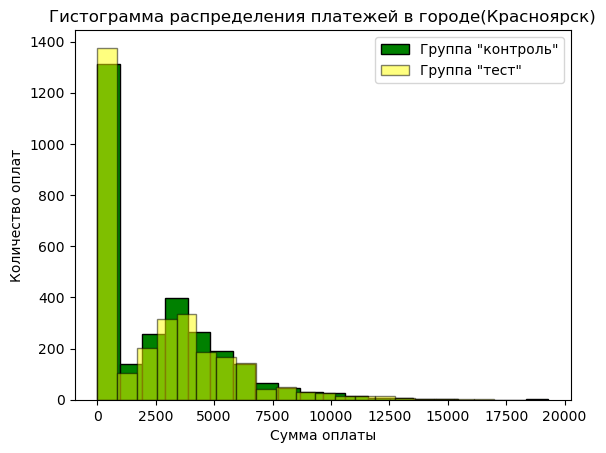

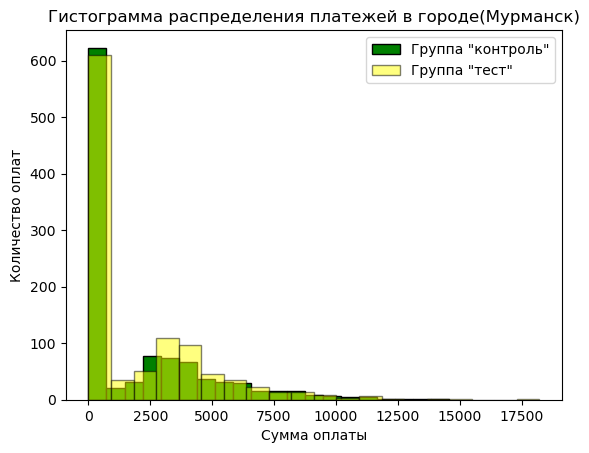

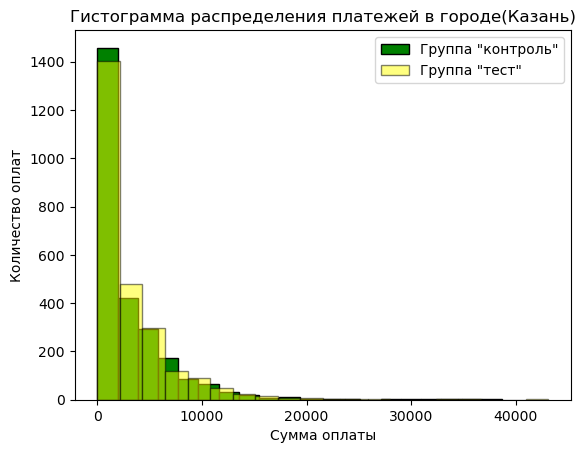

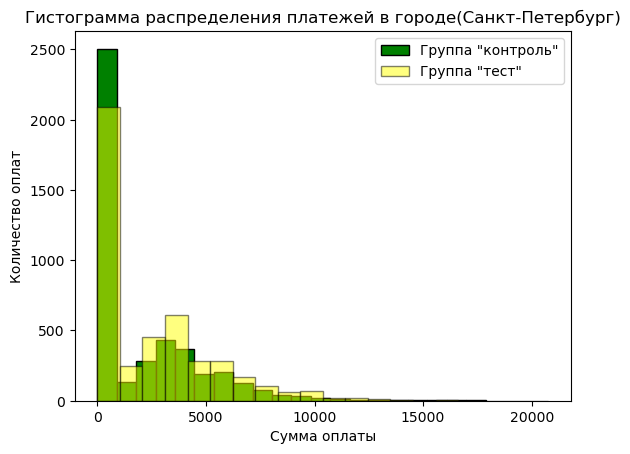

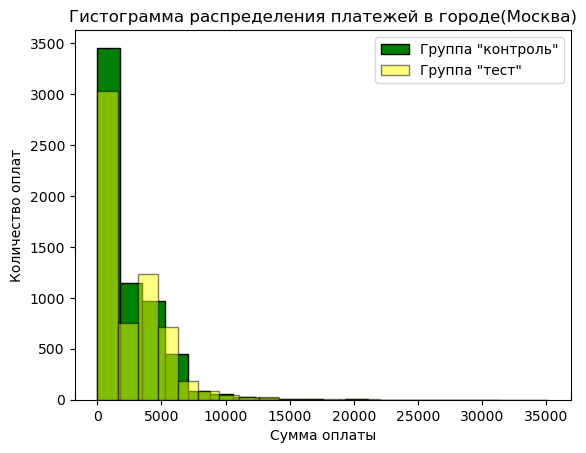

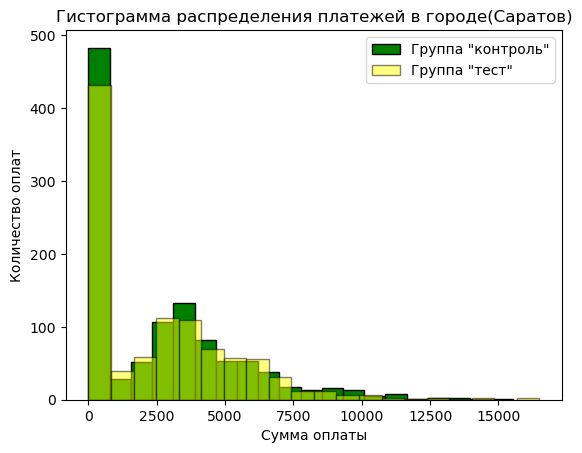

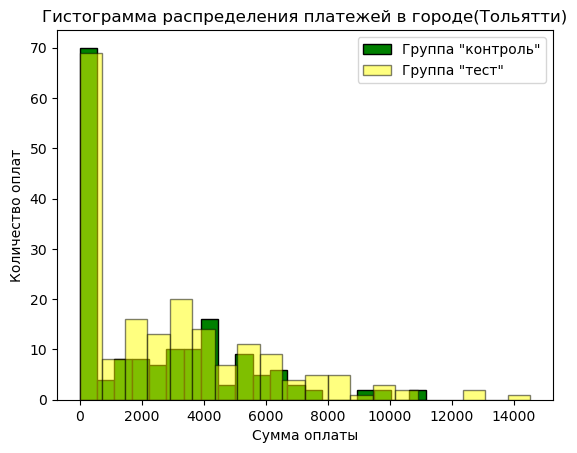

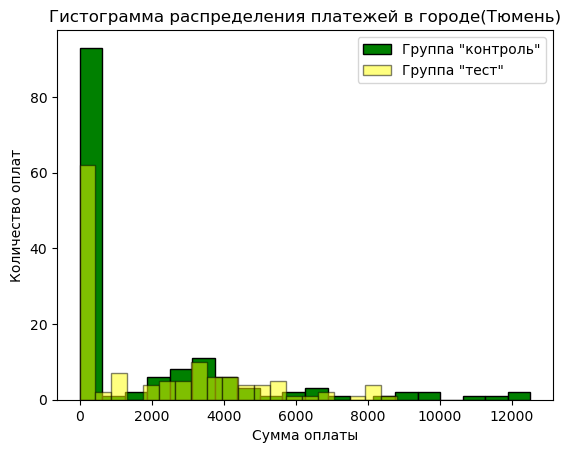

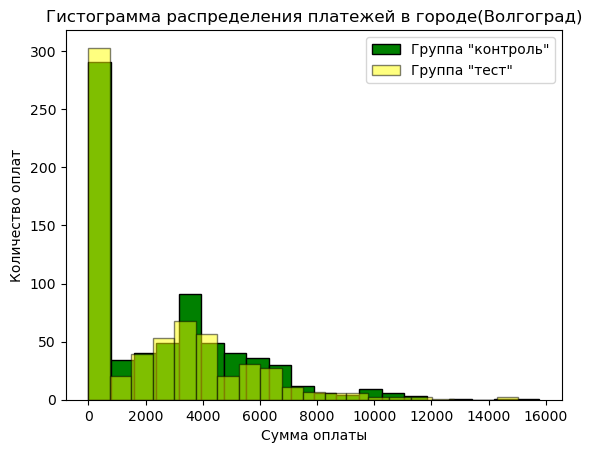

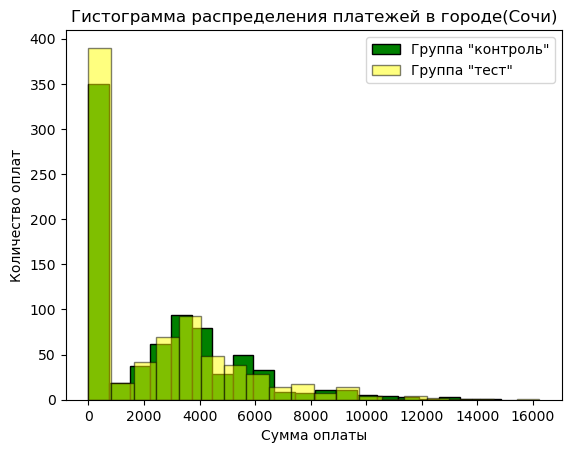

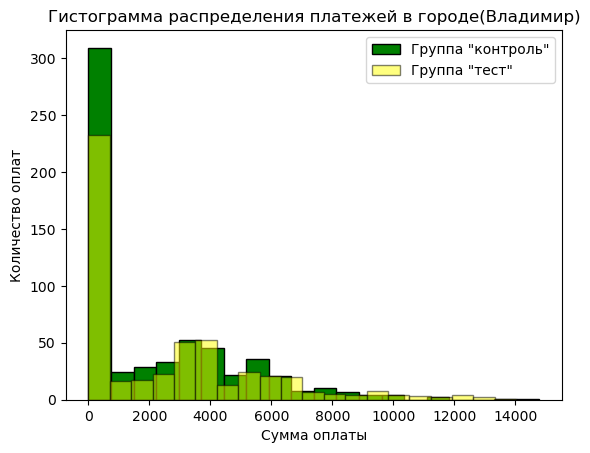

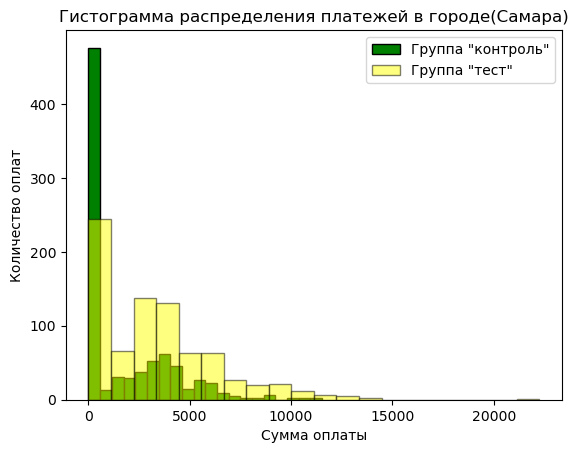

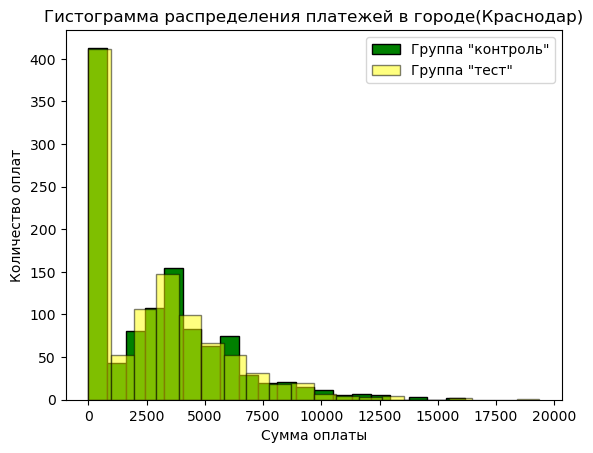

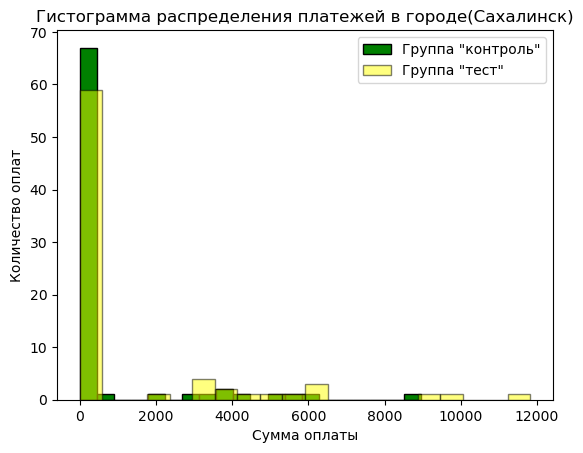

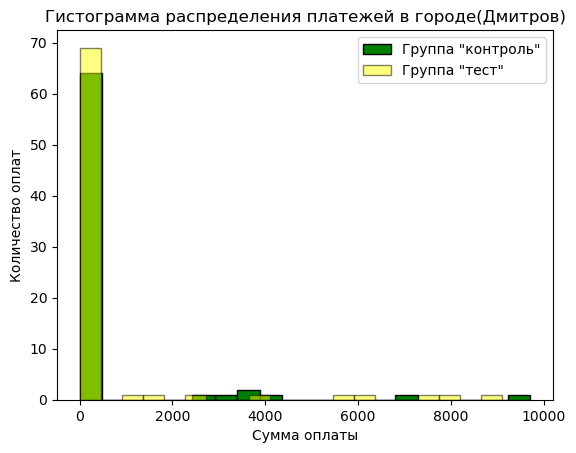

In [103]:
for i in df_res['city'].unique():
    print()
    df_0_city = df_res [(df_res ['nflag_test'] == 0)& (df_res ['city'] == i)]
    df_1_city = df_res [(df_res ['nflag_test'] == 1) & (df_res ['city'] == i)]
    df_0_city = df_0_city ['sum_amt_payment']
    df_1_city = df_1_city ['sum_amt_payment']
    plt.hist(df_0_city, bins = 20, color = 'green', edgecolor = 'black', label = 'Группа "контроль"')
    plt.hist(df_1_city, bins = 20, color = 'yellow', alpha = 0.5, edgecolor = 'black', label = 'Группа "тест" ')
    plt.title ('Гистограмма распределения платежей в городе' + '({})'.format (i) )
    plt.xlabel('Сумма оплаты')
    plt.ylabel ('Количество оплат')
    plt.legend(loc = 'upper right')
    plt.show()

In [104]:
df_res.head()

,id_client,dtime_ad,nflag_test,id_trading_point,sum_amt_payment,city,flag_pay
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1
1,223863,2022-08-20 21:56:54.325,0,212,0.0,Красноярск,0
2,201715,2022-07-30 19:07:49.264,1,212,4171.0,Красноярск,1
3,292010,2022-07-26 20:37:16.885,1,212,0.0,Красноярск,0
4,190438,2022-07-02 12:53:04.753,1,212,6026.0,Красноярск,1


In [107]:
cities = df_res['city'].unique()
id_trading_points = df_res['id_trading_point'].unique()

In [108]:
results = pd.DataFrame (columns = ['city','id_trading_point'\
                                  ,'count_test','count_control','count_all'\
                                  ,'percent_count','avg_payment_test', 'avg_payment_control', 'diff'\
                                  ,'sigma_test', 'sigma_control', 'ttest', 'pvalue_ttest'])

In [111]:
for i in cities:
    city = df_res[df_res['city']==i]
    
    for j in city ['id_trading_point'].unique(): 
        shop = city[city['id_trading_point']==j]
        
        count_test = len(shop[shop['nflag_test']==1])
        count_control = len(shop[shop['nflag_test']==0])
        count_all = count_test + count_control
        percent_count = count_all/count_all*100
        sigma_test = shop[shop['nflag_test']==1]['sum_amt_payment'].std()
        sigma_control = shop[shop['nflag_test']==0]['sum_amt_payment'].std()
        avg_payment_test = np.mean(shop[shop['nflag_test']==1]['sum_amt_payment'])
        avg_payment_control = np.mean(shop[shop['nflag_test']==0]['sum_amt_payment'])
        diff = avg_payment_test - avg_payment_control
        
        s,p = test_calc(shop[shop['nflag_test']==1]['sum_amt_payment'], shop[shop['nflag_test']==0]['sum_amt_payment'])
        
        
        results = results.append({'city':i,
                                  'id_trading_point':j,
                                  'count_test':count_test,
                                  'count_control':count_control,
                                  'count_all':count_all,
                                  'percent_count': percent_count,
                                  'avg_payment_test':avg_payment_test,
                                  'avg_payment_control':avg_payment_control,
                                  'diff':diff, 
                                  'sigma_test':sigma_test,
                                  'sigma_control':sigma_control,
                                  'ttest':s,
                                  'pvalue_ttest':p,}, ignore_index=True)
        

Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ


C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168

Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ


C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168

Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой


C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168

Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой


C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168

Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ


C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168

Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ


C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168

Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ


C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168

Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе ВЫШЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе СУЩЕСТВУЕТ
Среднее в контрольной группе НИЖЕ, чем в тестовой
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ


C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168

Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ
Разница между средними в контрольной и тестовой группе НЕ СУЩЕСТВУЕТ


C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,
C:\Users\LEN.S\AppData\Local\Temp\ipykernel_6168\2984023027.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':i,


In [112]:
results['percent_count'] = results['count_all']/results['count_all'].sum()
results['percent_count'] = results['percent_count'].astype(float)

In [113]:
results

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest
0,Красноярск,212,593,575,1168,0.025773,2144.317032,2222.052174,-77.735142,2708.588724,2785.116250,-0.483585,6.287709e-01
1,Красноярск,278,535,489,1024,0.022596,2499.345794,2185.214724,314.131070,2915.995329,2574.915597,1.820268,6.901056e-02
2,Красноярск,202,551,565,1116,0.024626,2927.341198,2730.378761,196.962437,2956.686241,2737.885785,1.155073,2.483083e-01
3,Красноярск,444,650,562,1212,0.026744,2404.106154,2545.734875,-141.628722,2810.828487,2797.138764,-0.876740,3.808017e-01
4,Красноярск,277,708,709,1417,0.031268,2285.750000,2431.365303,-145.615303,2712.677878,2868.587569,-0.981705,3.264128e-01
5,Мурманск,54,633,640,1273,0.028090,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.097556,9.223005e-01
6,Мурманск,55,422,425,847,0.018690,2109.106635,2111.272941,-2.166306,2790.993385,2804.223188,-0.011268,9.910125e-01
7,Казань,991,270,294,564,0.012445,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,2.450100e-02
8,Казань,699,482,494,976,0.021537,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594254,5.524804e-01
9,Казань,477,382,386,768,0.016947,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.891593,3.728909e-01


In [115]:
results['nflagtest_diff'] = np.where((results['pvalue_ttest'] < .05) & (results['diff'] > 0), 'Положительный исход'\
       , np.where((results['pvalue_ttest'] < .05) & (results['diff'] < 0), 'Отрицательный исход' ,'Нейтральный исход'))

In [116]:
results

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,nflagtest_diff
0,Красноярск,212,593,575,1168,0.025773,2144.317032,2222.052174,-77.735142,2708.588724,2785.116250,-0.483585,6.287709e-01,Нейтральный исход
1,Красноярск,278,535,489,1024,0.022596,2499.345794,2185.214724,314.131070,2915.995329,2574.915597,1.820268,6.901056e-02,Нейтральный исход
2,Красноярск,202,551,565,1116,0.024626,2927.341198,2730.378761,196.962437,2956.686241,2737.885785,1.155073,2.483083e-01,Нейтральный исход
3,Красноярск,444,650,562,1212,0.026744,2404.106154,2545.734875,-141.628722,2810.828487,2797.138764,-0.876740,3.808017e-01,Нейтральный исход
4,Красноярск,277,708,709,1417,0.031268,2285.750000,2431.365303,-145.615303,2712.677878,2868.587569,-0.981705,3.264128e-01,Нейтральный исход
5,Мурманск,54,633,640,1273,0.028090,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.097556,9.223005e-01,Нейтральный исход
6,Мурманск,55,422,425,847,0.018690,2109.106635,2111.272941,-2.166306,2790.993385,2804.223188,-0.011268,9.910125e-01,Нейтральный исход
7,Казань,991,270,294,564,0.012445,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,2.450100e-02,Положительный исход
8,Казань,699,482,494,976,0.021537,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594254,5.524804e-01,Нейтральный исход
9,Казань,477,382,386,768,0.016947,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.891593,3.728909e-01,Нейтральный исход


In [117]:
City_positive = results[results['nflagtest_diff'] == 'Положительный исход']['city'].unique()
print(f"Города с положительным исходом: {City_positive}")

Города с положительным исходом: ['Казань' 'Санкт-Петербург' 'Москва' 'Владимир' 'Самара']


In [118]:
pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [119]:
import xlsxwriter

In [121]:
writer = pd.ExcelWriter('Калькулятор SkyLenta.xlsx', engine="xlsxwriter")

results[results['nflagtest_diff']=='Положительный исход'].to_excel(writer, sheet_name='Положительные исходы', index=False)
results[results['nflagtest_diff']=='Отрицательный исход'].to_excel(writer, sheet_name='Отрицательные исходы', index=False)
results[results['nflagtest_diff']=='Нейтральный исход'].to_excel(writer, sheet_name='Нейтральные исходы', index=False)

writer.close()